# Ölçeklendirme ve Normalizasyon

## Bir veri setindeki sayısal değerleri modellemede yardımcı alması amacıyla dönüştürmek gerekir.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

### Scaling (Ölçeklendirme) => verinin sınırları değiştirilir.
### Normalizasyon => Verinin dağılım şeklini değiştirir.



In [4]:
veri = np.random.exponential(size=1000)

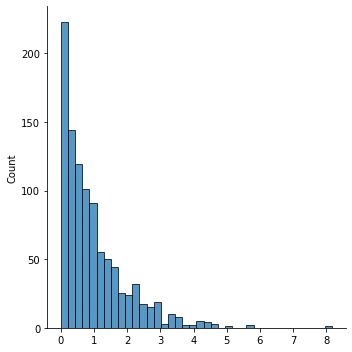

In [5]:
sns.displot(veri)

In [7]:
olcekli_veri = minmax_scaling(veri, columns=[0])

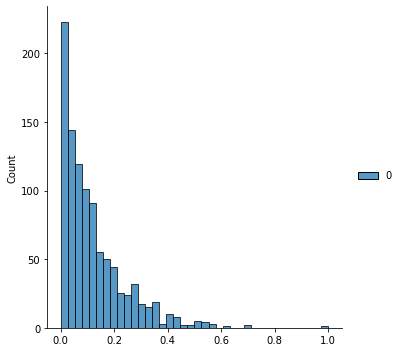

In [9]:
sns.displot(olcekli_veri)

C:\Users\yasar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yasar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ölçekli Veri')

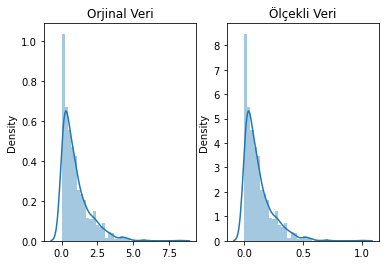

In [12]:
fig, ax = plt.subplots(1,2)
sns.distplot(veri, ax=ax[0])
ax[0].set_title("Orjinal Veri")
sns.distplot(olcekli_veri, ax=ax[1])
ax[1].set_title("Ölçekli Veri")

In [13]:
normalize_veri = stats.boxcox(veri)

C:\Users\yasar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yasar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalize Veri')

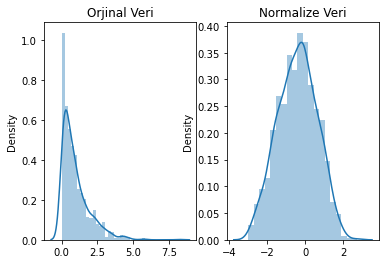

In [17]:
fig, ax = plt.subplots(1,2)
sns.distplot(veri, ax=ax[0])
ax[0].set_title("Orjinal Veri")
sns.distplot(normalize_veri[0], ax=ax[1])
ax[1].set_title("Normalize Veri")

## Tarihleri Okumak

In [21]:
df = pd.DataFrame({'year': [2021, 2020], 'month':[5, 9], 'day':[3, 9]})

In [19]:
print(df)

   sene  ay  gun
0  2021   5    3
1  2020   9    9


In [22]:
pd.to_datetime(df)

0   2021-05-03
1   2020-09-09
dtype: datetime64[ns]

In [23]:
saniye = 1634821096

In [27]:
df = pd.DataFrame({'saniye':[1634821096, 1634811096], 'deger':[43, 21]})

In [28]:
print(df)

       saniye  deger
0  1634821096     43
1  1634811096     21


In [29]:
df['okunur_tarih_zaman']=pd.to_datetime(df.saniye, unit='s') 

In [30]:
df.head()

,saniye,deger,okunur_tarih_zaman
0,1634821096,43,2021-10-21 12:58:16
1,1634811096,21,2021-10-21 10:11:36


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   saniye              2 non-null      int64         
 1   deger               2 non-null      int64         
 2   okunur_tarih_zaman  2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 176.0 bytes


In [33]:
df = pd.DataFrame({'tarihZaman':['2021-10-21 14:03:23','2020-04-27 08:32:12'], 'deger':[32, 83]})

In [34]:
df.head()

,tarihZaman,deger
0,2021-10-21 14:03:23,32
1,2020-04-27 08:32:12,83


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tarihZaman  2 non-null      object
 1   deger       2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [37]:
df['data_time']=pd.to_datetime(df.tarihZaman)

In [38]:
df

,tarihZaman,deger,data_time
0,2021-10-21 14:03:23,32,2021-10-21 14:03:23
1,2020-04-27 08:32:12,83,2020-04-27 08:32:12


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tarihZaman  2 non-null      object        
 1   deger       2 non-null      int64         
 2   data_time   2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 176.0+ bytes


In [40]:
df.data_time

0   2021-10-21 14:03:23
1   2020-04-27 08:32:12
Name: data_time, dtype: datetime64[ns]

In [41]:
df.data_time.dt.weekday

0    3
1    0
Name: data_time, dtype: int64

## Encoding

In [43]:
mesaj = 'æ–‡å—åŒ–ã??'

In [44]:
print(mesaj)

æ–‡å—åŒ–ã??


In [45]:
onceki = "Ağaç, şair, ve balık"
type(onceki)

str

In [46]:
sonraki = onceki.encode("utf-8", errors="replace")
type(sonraki)

bytes

In [47]:
sonraki

b'A\xc4\x9fa\xc3\xa7, \xc5\x9fair, ve bal\xc4\xb1k'

In [50]:
sonraki.decode("utf-8")

'Ağaç, şair, ve balık'

In [54]:
np.std(normalize_veri[0])

1.0216665883967826

## Veri Tutarlılığı

In [2]:
df = pd.DataFrame({'ulkeler':['Almanya','almanya','İngiltere','ingiltere',' Türkiye','Türkiye'],'veri':[2,5,7,3,9,1]})

In [65]:
df.head(6)

,ulkeler,veri
0,Almanya,2
1,almanya,5
2,İngiltere,7
3,ingiltere,3
4,Türkiye,9
5,Türkiye,1


In [57]:
df['ulkeler'].unique()

array(['Almanya', 'almanya', 'İngiltere', 'ingiltere', ' Türkiye',
       'Türkiye'], dtype=object)

In [69]:
df.groupby(['ulkeler']).sum()

,veri
ulkeler,
Türkiye,9
Almanya,2
Türkiye,1
almanya,5
ingiltere,3
İngiltere,7


In [70]:
df['ulkeler']=df['ulkeler'].str.lower()

In [71]:
df.head(6)

,ulkeler,veri
0,almanya,2
1,almanya,5
2,i̇ngiltere,7
3,ingiltere,3
4,türkiye,9
5,türkiye,1


In [72]:
df.groupby(['ulkeler']).sum()

,veri
ulkeler,
türkiye,9
almanya,7
ingiltere,3
i̇ngiltere,7
türkiye,1


In [75]:
df['byte']=df['ulkeler'].str.encode(encoding='utf-8')

In [76]:
df

,ulkeler,veri,byte
0,almanya,2,b'almanya'
1,almanya,5,b'almanya'
2,i̇ngiltere,7,b'i\xcc\x87ngiltere'
3,ingiltere,3,b'ingiltere'
4,türkiye,9,b' t\xc3\xbcrkiye'
5,türkiye,1,b't\xc3\xbcrkiye'


In [6]:
from fuzzywuzzy import process

In [7]:
benzerler = fuzzywuzzy.process.extract("ingiltere",
                                       df.ulkeler, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [8]:
benzerler

[('ingiltere', 100, 3),
 ('İngiltere', 95, 2),
 (' Türkiye', 27, 4),
 ('Türkiye', 27, 5),
 ('Almanya', 12, 0),
 ('almanya', 12, 1)]

In [12]:
def bir_kolondaki_benzerleri_bul(df, kolon, string_to_match, min_ratio=47):
    benzerler = fuzzywuzzy.process.extract(string_to_match,
                                       df.ulkeler, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    cok_benzerler = [benzer[0] for benzer in benzerler if benzer[1] >= min_ratio]
    benzer_satirlar = df[kolon].isin(cok_benzerler)
    df.loc[benzer_satirlar, kolon] = string_to_match
    print(f"{string_to_match} değiştirildi")
    

In [13]:
bir_kolondaki_benzerleri_bul(df=df, kolon='ulkeler', string_to_match='İngiltere')

İngiltere değiştirildi


In [14]:
df.head()

,ulkeler,veri
0,Almanya,2
1,almanya,5
2,İngiltere,7
3,İngiltere,3
4,Türkiye,9


In [15]:
df['byte']=df['ulkeler'].str.encode(encoding='utf-8')

In [16]:
df.head()

,ulkeler,veri,byte
0,Almanya,2,b'Almanya'
1,almanya,5,b'almanya'
2,İngiltere,7,b'\xc4\xb0ngiltere'
3,İngiltere,3,b'\xc4\xb0ngiltere'
4,Türkiye,9,b' T\xc3\xbcrkiye'


In [18]:
for ulke in df['ulkeler']:
    bir_kolondaki_benzerleri_bul(df=df, kolon='ulkeler', string_to_match=ulke)

Almanya değiştirildi
Almanya değiştirildi
İngiltere değiştirildi
İngiltere değiştirildi
 Türkiye değiştirildi
 Türkiye değiştirildi


In [19]:
df.head(6)

,ulkeler,veri,byte
0,Almanya,2,b'Almanya'
1,Almanya,5,b'almanya'
2,İngiltere,7,b'\xc4\xb0ngiltere'
3,İngiltere,3,b'\xc4\xb0ngiltere'
4,Türkiye,9,b' T\xc3\xbcrkiye'
5,Türkiye,1,b'T\xc3\xbcrkiye'


In [20]:
df.groupby(['ulkeler']).sum()

,veri
ulkeler,
Türkiye,10
Almanya,7
İngiltere,10
